In [63]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Load data from output txt file:
# data = np.loadtxt('TuneParticle.txt')
data = np.loadtxt('ReferenceParticle.txt')

# Figure directory:
dir = 'Figures/'

In [64]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []; mod_t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
for i in range(data.shape[0]):
    x_vals.append(data[i][0]*0.1) # mm -> cm
    y_vals.append(data[i][1]*0.1)
    z_vals.append(data[i][2]*0.001-0.7) # mm -> m and add shift to fix initial offset
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    t = data[i][6]
    t_vals.append(t) # ns
    mod_t = t % T
    mod_t_vals.append(mod_t)
    # Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
    Bx = data[i][12]*200; By = data[i][13]*200; Bz = data[i][14] # rescale Bx, By for plotting
    Bx_vals.append(Bx)
    By_vals.append(By)
    Bz_vals.append(Bz)
    del px, py, pz, t, Bx, By, Bz

    z = data[i][2]*0.001-0.7
    if z == 0:
        print(z)
        print(i)
    if z > 4.20 and z < 4.21:
        print(z)
        print(i)
    if z > 8.40 and z < 8.41:
        print(z)
        print(i)

4.20497
575
8.40483
1067


In [65]:
print('Initial z: '+str(z_vals[0]))
print('Final z: '+str(z_vals[len(z_vals)-1]))
# ADD SHIFT OF -700 mm TO Z VALUES (FROM INITIAL BEAM OFFSET)

Initial z: -0.7
Final z: 47.810599999999994


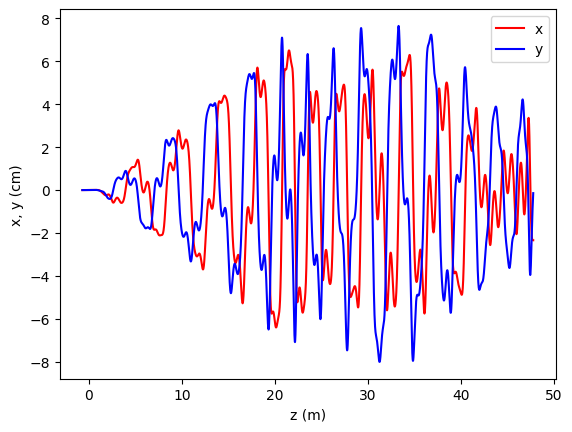

In [66]:
# Plot x, y along z:
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
# lim = 800
# plt.plot(z_vals[:lim],x_vals[:lim],color='red',label='x')
# plt.plot(z_vals[:lim],y_vals[:lim],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()

Text(0, 0.5, 'y (cm)')

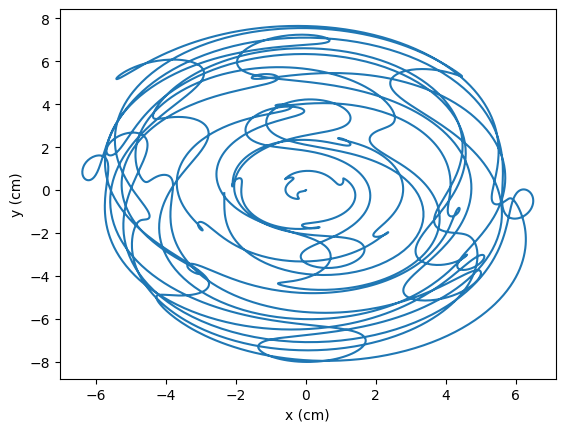

In [67]:
# Plot projection in x-y plane:
plt.plot(x_vals,y_vals)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

4.20497
8.40483


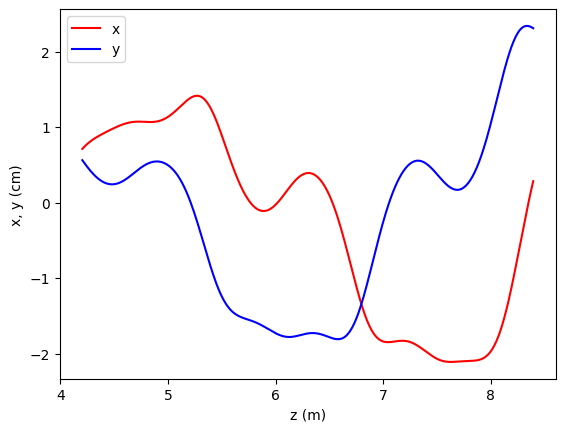

In [68]:
# Plot single period of data:
lower_lim = 575
upper_lim = 1067
plt.plot(z_vals[lower_lim:upper_lim],x_vals[lower_lim:upper_lim],color='red',label='x')
plt.plot(z_vals[lower_lim:upper_lim],y_vals[lower_lim:upper_lim],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()

print(z_vals[lower_lim])
print(z_vals[upper_lim])

Text(0, 0.5, 'y (cm)')

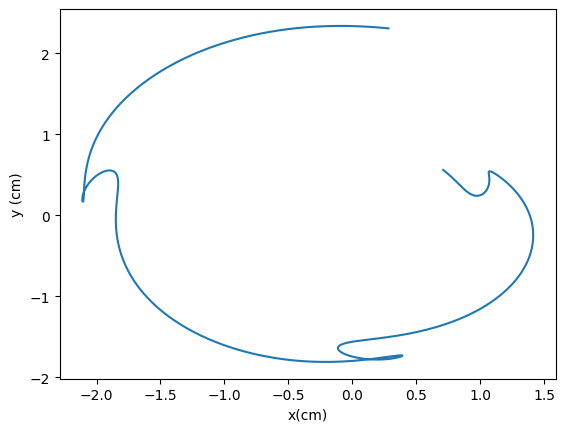

In [69]:
# Plot x-y trajectory for single period of data:
plt.plot(x_vals[lower_lim:upper_lim],y_vals[lower_lim:upper_lim])
plt.xlabel('x(cm)')
plt.ylabel('y (cm)')

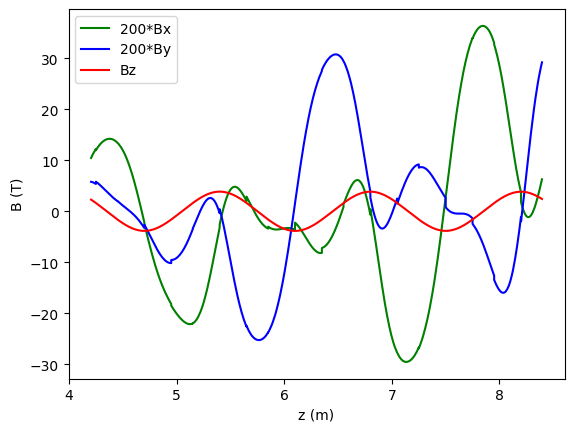

In [70]:
# Plot magnetic field for a single period of data:
plt.plot(z_vals[lower_lim:upper_lim],Bx_vals[lower_lim:upper_lim],color='green',label='200*Bx')
plt.plot(z_vals[lower_lim:upper_lim],By_vals[lower_lim:upper_lim],color='blue',label='200*By')
plt.plot(z_vals[lower_lim:upper_lim],Bz_vals[lower_lim:upper_lim],color='red',label='Bz')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()

In [ ]:
# Load data from paper -- for single period:
dir = '/Users/criggall/Documents/muon-cooling/'
xdata = np.genfromtxt(dir+'paper_x_vs_z.csv',delimiter=',')
xdata_x = []; xdata_z = []
for i in range(len(xdata)):
    xdata_z.append(xdata[i][0])
    xdata_x.append(xdata[i][1])
ydata = np.genfromtxt(dir+'paper_y_vs_z.csv',delimiter=',')
ydata_y = []; ydata_z = []
for i in range(len(ydata)):
    ydata_z.append(ydata[i][0])
    ydata_y.append(ydata[i][1])

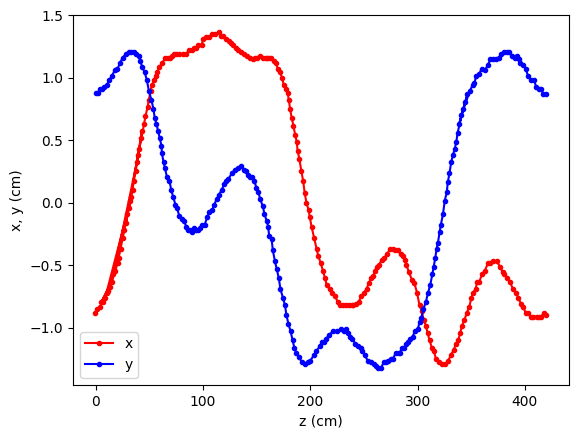

In [74]:
# Plot x, y along z from paper -- for single period:
plt.plot(xdata_z,xdata_x,color='red',label='x',marker='.')
plt.plot(ydata_z,ydata_y,color='blue',label='y',marker='.')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()

Text(0, 0.5, 'y (cm)')

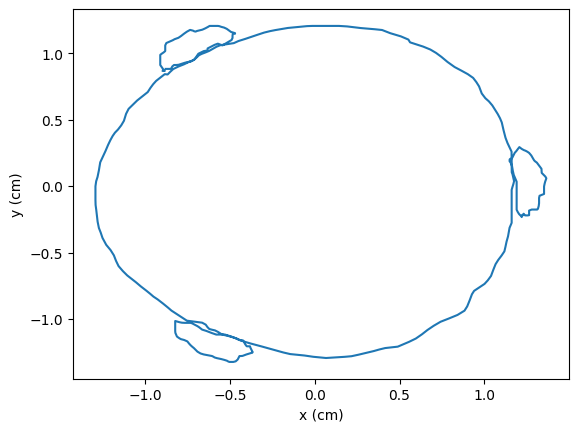

In [73]:
# Plot x-y trajeectory from paper -- for single period:
num = upper_lim - lower_lim
z_range = np.linspace(0,420,num)
x_interp = np.interp(z_range,xdata_z,xdata_x)
y_interp = np.interp(z_range,ydata_z,ydata_y)
plt.plot(x_interp,y_interp)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')